In [18]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("D:/MS DS/TT for DS Theory/data set of cardio disease/heart_statlog_cleveland_hungary_final.csv")
df.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [20]:
df2 = df[['target',"chest pain type",'age','oldpeak']]
df2.head()

,target,chest pain type,age,oldpeak
0,0,2,40,0.0
1,1,3,49,1.0
2,0,2,37,0.0
3,1,4,48,1.5
4,0,3,54,0.0


In [21]:
df3 = df2.fillna(df2.mean())

In [22]:
X = df3.drop("target", axis = 1)
y = df3["target"]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (1190, 3)
Shape of y =  (1190,)


In [23]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=50)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (952, 3)
Shape of y_train =  (952,)
Shape of X_test =  (238, 3)
Shape of y_test =  (238,)


In [24]:
sc = StandardScaler()
sc.fit(X_train )

StandardScaler()

In [25]:
sc.mean_

array([ 3.24159664, 53.75210084,  0.92058824])

In [26]:
sc.scale_

array([0.93059165, 9.37755544, 1.08317755])

In [27]:
X_train.describe()

,chest pain type,age,oldpeak
count,952.000000,952.000000,952.000000
mean,3.241597,53.752101,0.920588
std,0.931081,9.382485,1.083747
min,1.000000,28.000000,-2.600000
25%,3.000000,47.000000,0.000000
50%,4.000000,54.000000,0.600000
75%,4.000000,61.000000,1.500000
max,4.000000,77.000000,6.200000


In [28]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [29]:
X_train_sc

array([[-0.25961617, -0.18683983, -0.84989597],
       [-1.33420136, -1.35985342, -0.84989597],
       [-0.25961617, -0.50675263,  0.99652339],
       ...,
       [-1.33420136,  0.34634817,  0.07331371],
       [ 0.81496902,  0.23971057,  0.99652339],
       [-1.33420136, -1.57312862, -0.84989597]])

In [30]:
X_train_sc =  pd.DataFrame(X_train_sc, columns = ["chest pain type",'age','oldpeak'])
X_test_sc =  pd.DataFrame(X_test_sc, columns = ["ST slchest pain type",'age','oldpeak'])

In [31]:
X_train_sc.head()

,chest pain type,age,oldpeak
0,-0.259616,-0.186840,-0.849896
1,-1.334201,-1.359853,-0.849896
2,-0.259616,-0.506753,0.996523
3,-1.334201,-2.106317,-0.849896
4,0.814969,-1.999679,0.442598


In [32]:
X_train_sc.describe().round(2)

,chest pain type,age,oldpeak
count,952.00,952.00,952.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.41,-2.75,-3.25
25%,-0.26,-0.72,-0.85
50%,0.81,0.03,-0.30
75%,0.81,0.77,0.53
max,0.81,2.48,4.87


In [33]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [34]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [35]:
X_train_mmc

array([[0.66666667, 0.48979592, 0.29545455],
       [0.33333333, 0.26530612, 0.29545455],
       [0.66666667, 0.42857143, 0.52272727],
       ...,
       [0.33333333, 0.59183673, 0.40909091],
       [1.        , 0.57142857, 0.52272727],
       [0.33333333, 0.2244898 , 0.29545455]])

In [37]:
X_train_mmc =  pd.DataFrame(X_train_mmc, columns = ["chest pain type",'age','oldpeak'])
X_test_mmc =  pd.DataFrame(X_test_mmc, columns = ["chest pain type",'age','oldpeak'])

In [38]:
X_train_mmc.describe().round(2)

,chest pain type,age,oldpeak
count,952.00,952.00,952.00
mean,0.75,0.53,0.40
std,0.31,0.19,0.12
min,0.00,0.00,0.00
25%,0.67,0.39,0.30
50%,1.00,0.53,0.36
75%,1.00,0.67,0.47
max,1.00,1.00,1.00


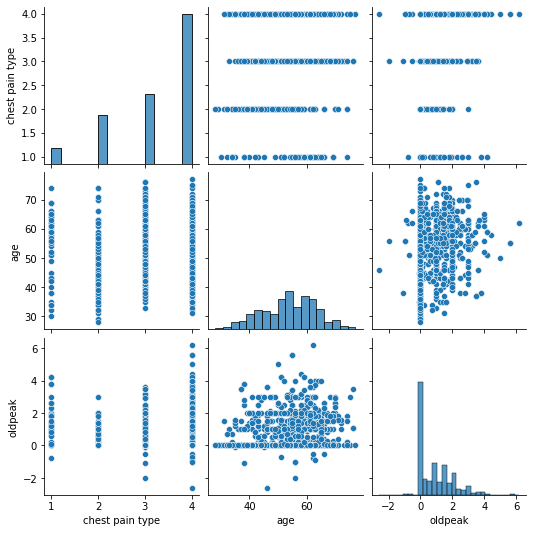

In [39]:
sns.pairplot(X_train)

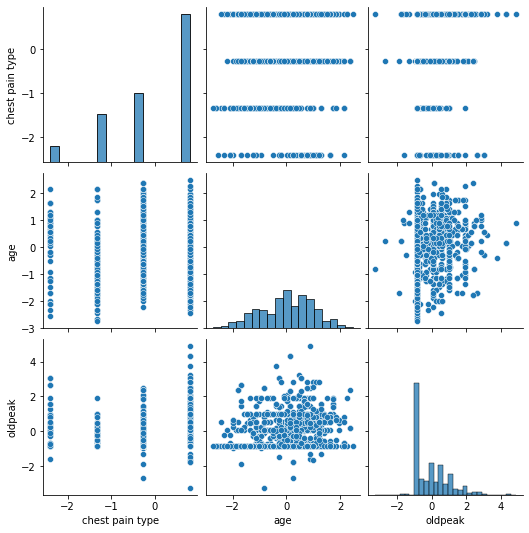

In [40]:
sns.pairplot(X_train_sc)

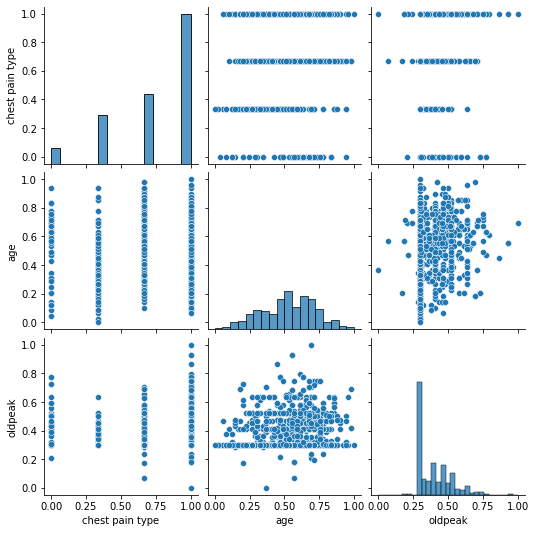

In [41]:
sns.pairplot(X_train_mmc)